In [7]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle

### Load data for the plots

In [15]:
pcons_res=pd.read_csv('davis_figures_data/pconsc4_original_davis_data.csv')

rand_mol_res=pd.read_csv('davis_figures_data1/pconcs4_random_davis_data.csv')

pcons_res_mol=pd.read_csv('davis_figures_data/pconcs4_original_ligand_davis_data.csv')

point_rand_mol=pd.read_csv('davis_figures_data1/pconcs4_congeneric_ligand_davis_data.csv')
point_rand_nod_mol=pd.read_csv('davis_figures_data1/ligand_davis_random_node_data.csv')

vertical_stack2 = pd.concat([pcons_res_mol, rand_mol_res,point_rand_mol,point_rand_nod_mol], axis=0)
df_melted2 = pd.melt(vertical_stack2, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [16]:
concat_res=pd.read_csv('davis_figures_data1/pconcs4_original_concat_davis_data.csv')

prod_res=pd.read_csv('davis_figures_data1/pconcs4_original_product_davis_data.csv')

prod_con_res=pd.read_csv('davis_figures_data1/pconcs4_original_ligand_prod+conc_davis_data.csv')



vertical_stack3 = pd.concat([concat_res,prod_res, prod_con_res], axis=0)
df_melted3 = pd.melt(vertical_stack3, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [3]:
pcons_res=pd.read_csv('davis_figures_data/pconsc4_original_davis_data.csv')
esm_res=pd.read_csv('davis_figures_data/esm_original_davis_data.csv')
alpha_res=pd.read_csv('davis_figures_data/alphafold_original_davis_data.csv')
random_res=pd.read_csv('davis_figures_data/rand_original_davis_data.csv')
rand_mol_res=pd.read_csv('davis_figures_data/pconcs4_random_davis_data.csv')
pcons_res_mol=pd.read_csv('davis_figures_data/pconcs4_original_ligand_davis_data.csv')
vertical_stack1 = pd.concat([pcons_res, esm_res,alpha_res,random_res], axis=0)
df_melted1 = pd.melt(vertical_stack1, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
# rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
# pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
vertical_stack2 = pd.concat([pcons_res_mol, rand_mol_res], axis=0)
df_melted2 = pd.melt(vertical_stack2, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [10]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [11]:
sns.set(font_scale = 3,style="white")

### Boxplot- comparision of protein encodings from various contact map techniques

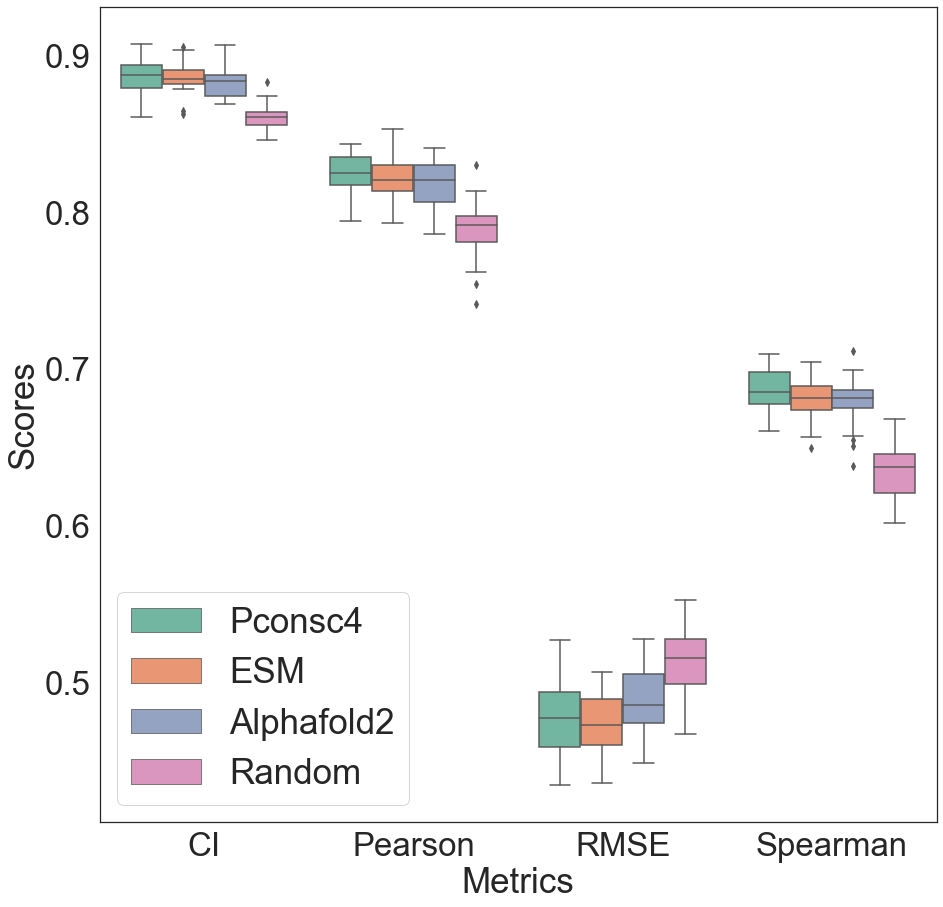

In [9]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower left',fontsize=35)

fig.savefig(os.path.join('results_plots_davis',  'boxplot_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_proteins' + '.svg'), dpi=500, bbox_inches='tight')


### Boxplot- comparision of ligand encodings 

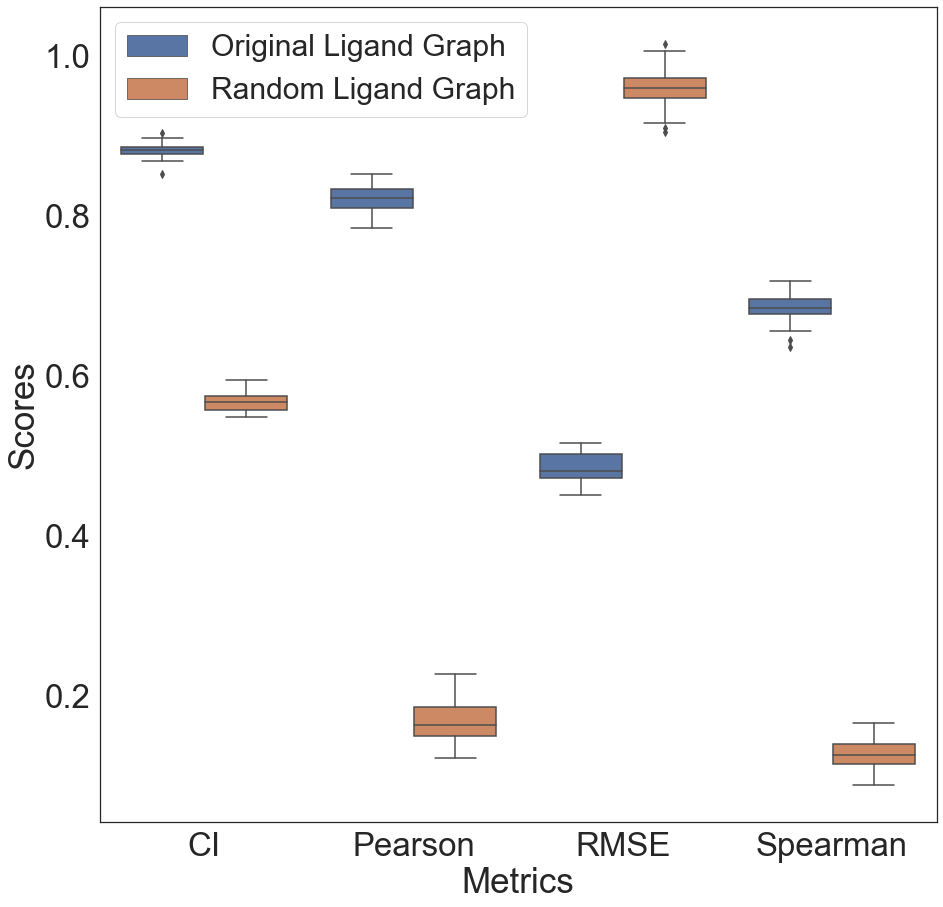

In [14]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Original Ligand Graph','Random Ligand Graph']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted2, order=order,  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='upper left',fontsize=30)

fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands' + '.svg'), dpi=500, bbox_inches='tight')

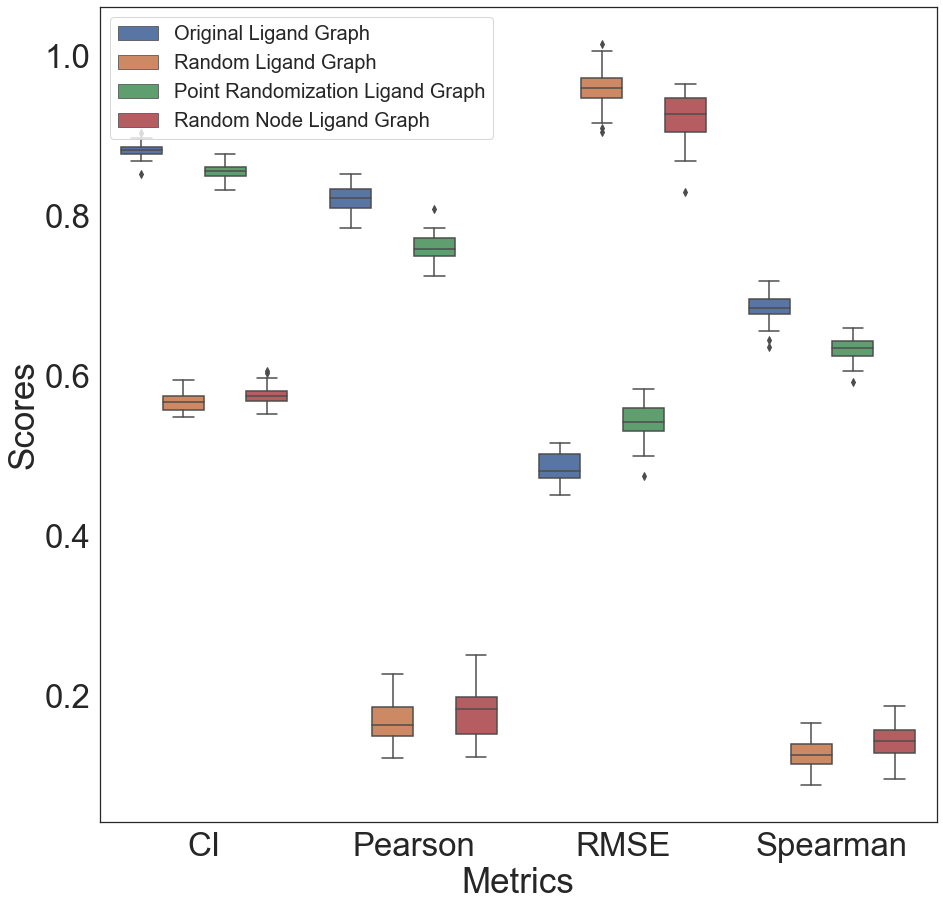

In [18]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='Encoding', data=df_melted2, order=order,  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='upper left',fontsize=20)

fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands_11' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands_11' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands_11' + '.svg'), dpi=500, bbox_inches='tight')

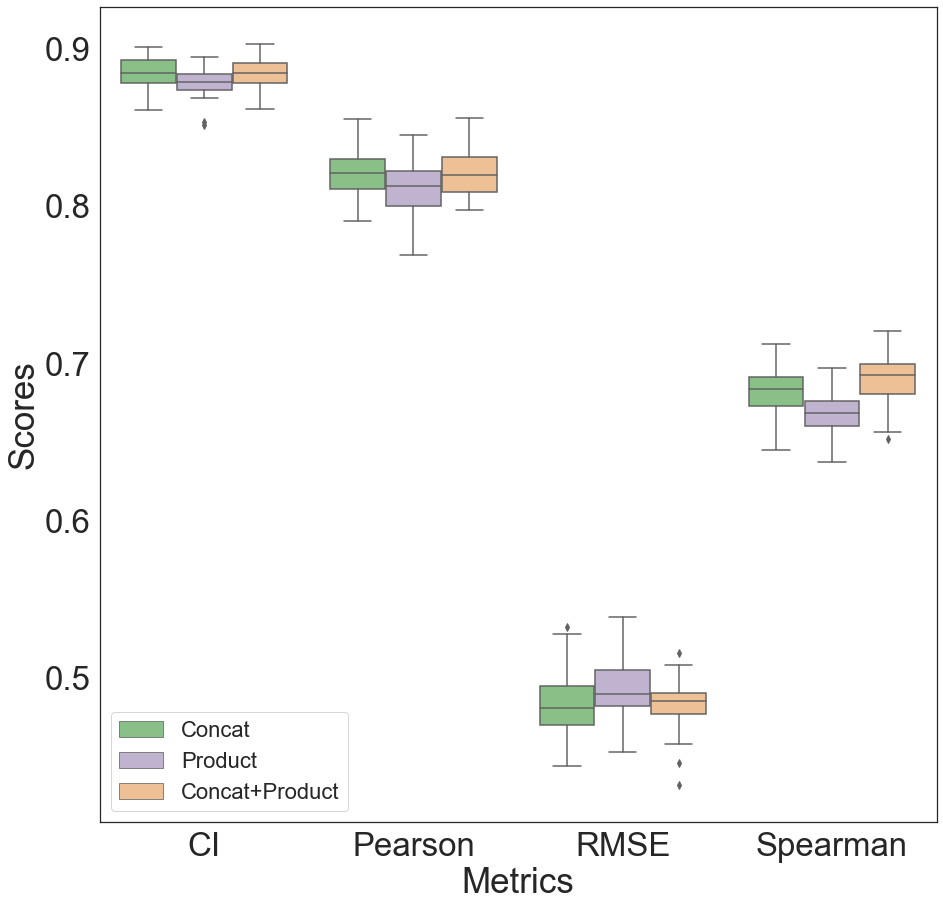

In [19]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Concat','Product','Concat+Product']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='Encoding', data=df_melted3, order=order,palette="Accent",  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower left',fontsize=22)

fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands_21' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands_21' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'boxplot_ligands_21' + '.svg'), dpi=500, bbox_inches='tight')

In [ ]:
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3",]
# Set your custom color palette
pal=sns.set_palette(sns.color_palette(colors))
